In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Setting Seaborn style
sns.set_style()

In [3]:
# Reading the training and testing data
train_data = pd.read_csv(r"C:\Users\welcome\Desktop\Data Sets\train.csv")
test_data = pd.read_csv(r"C:\Users\welcome\Desktop\Data Sets\test.csv")

In [4]:
# Displaying the first 10 rows of the training data
train_data.head(10)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15        9.300          Low Fat         0.016047   
1           DRC01        5.920          Regular         0.019278   
2           FDN15       17.500          Low Fat         0.016760   
3           FDX07       19.200          Regular         0.000000   
4           NCD19        8.930          Low Fat         0.000000   
5           FDP36       10.395          Regular         0.000000   
6           FDO10       13.650          Regular         0.012741   
7           FDP10          NaN          Low Fat         0.127470   
8           FDH17       16.200          Regular         0.016687   
9           FDU28       19.200          Regular         0.094450   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   
5           Baking Goods   51.4008            OUT018   
6            Snack Foods   57.6588            OUT013   
7            Snack Foods  107.7622            OUT027   
8           Frozen Foods   96.9726            OUT045   
9           Frozen Foods  187.8214            OUT017   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   
5                       2009      Medium               Tier 3   
6                       1987        High               Tier 3   
7                       1985      Medium               Tier 3   
8                       2002         NaN               Tier 2   
9                       2007         NaN               Tier 2   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052  
5  Supermarket Type2           556.6088  
6  Supermarket Type1           343.5528  
7  Supermarket Type3          4022.7636  
8  Supermarket Type1          1076.5986  
9  Supermarket Type1          4710.5350

In [5]:
# Getting information about the training data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# Dropping duplicate rows from the training data
train_data.drop_duplicates(inplace=True)

In [7]:
# Counting the occurrences of unique values in 'Item_Identifier'
train_data.value_counts("Item_Identifier")

Item_Identifier
FDG33    10
FDW13    10
NCL31     9
FDX04     9
NCQ06     9
         ..
FDN52     1
FDC23     1
FDT35     1
DRF48     1
FDE52     1
Length: 1559, dtype: int64

In [8]:
# Counting the occurrences of unique values in 'Item_Fat_Content'
train_data.value_counts("Item_Fat_Content")

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
dtype: int64

In [9]:
# Consolidating 'Item_Fat_Content' categories
train_data.loc[train_data["Item_Fat_Content"].isin(["LF","low fat"]), "Item_Fat_Content"] = "Low Fat"
train_data.loc[train_data["Item_Fat_Content"].isin(["reg"]), "Item_Fat_Content"] = "Regular"

In [10]:
# Verifying the consolidation
train_data.value_counts("Item_Fat_Content")

Item_Fat_Content
Low Fat    5517
Regular    3006
dtype: int64

In [11]:
# Counting the occurrences of unique values in 'Item_Type'
train_data.value_counts("Item_Type")

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
dtype: int64

In [12]:
# Counting the occurrences of unique values in 'Outlet_Identifier'
train_data.value_counts("Outlet_Identifier") 

Outlet_Identifier
OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
dtype: int64

In [13]:
# Counting the occurrences of unique values in 'Outlet_Identifier'
train_data["Outlet_Establishment_Year"].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [14]:
# # Counting the occurrences of unique values in 'Outlet_Size'
train_data.value_counts("Outlet_Size") 

Outlet_Size
Medium    2793
Small     2388
High       932
dtype: int64

In [15]:
# Counting the occurrences of unique values in 'Outlet_Location_Type'
train_data.value_counts("Outlet_Location_Type") 

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
dtype: int64

In [16]:
# Counting the occurrences of unique values in 'Outlet_Type'
train_data.value_counts("Outlet_Type") 

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
dtype: int64

In [17]:
# Printing the percentage of missing values in 'Outlet_Size'
print(train_data["Outlet_Size"].isna().sum() / 8523)

0.2827642848762173


In [18]:
train_data.groupby("Outlet_Identifier")["Outlet_Size"].apply(lambda x: x.mode()).to_dict()

{('OUT013', 0): 'High',
 ('OUT018', 0): 'Medium',
 ('OUT019', 0): 'Small',
 ('OUT027', 0): 'Medium',
 ('OUT035', 0): 'Small',
 ('OUT046', 0): 'Small',
 ('OUT049', 0): 'Medium'}

In [19]:
# Grouping 'Outlet_Size' by 'Outlet_Identifier' and filling missing values
identifier_dict = {'OUT010': 'Medium', 'OUT013': 'High', 'OUT017': 'Medium', 'OUT018': 'Medium',
                   'OUT019': 'Small', 'OUT027': 'Medium', 'OUT035': 'Small', 'OUT045': 'Medium',
                   'OUT046': 'Small', 'OUT049': 'Medium'}
train_data["Outlet_Size"] = train_data["Outlet_Size"].fillna(train_data["Outlet_Identifier"].map(identifier_dict))

In [20]:
# Verifying the removal of missing values in 'Outlet_Size'
print(train_data["Outlet_Size"].isna().sum() / 8523)

0.0


In [21]:
# Printing the percentage of missing values in 'Item_Weight'
print(train_data["Item_Weight"].isna().sum() / 8523)

0.1716531737651062


In [22]:
# Filling missing values in 'Item_Weight' based on 'Item_Type'
weight_dict = train_data.groupby("Item_Type")["Item_Weight"].mean().to_dict()
train_data["Item_Weight"] = train_data["Item_Weight"].fillna(train_data["Item_Type"].map(weight_dict))

In [23]:
# Verifying the removal of missing values in 'Item_Weight'
print(train_data["Item_Weight"].isna().sum() / 8523)

0.0


In [26]:
# Describing the numerical columns of the training data
train_data.describe()

Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  8523.000000      8523.000000  8523.000000                8523.000000   
mean     12.857890         0.066132   140.992782                1997.831867   
std       4.232804         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       9.310000         0.026989    93.826500                1987.000000   
50%      12.867061         0.053931   143.012800                1999.000000   
75%      16.000000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800

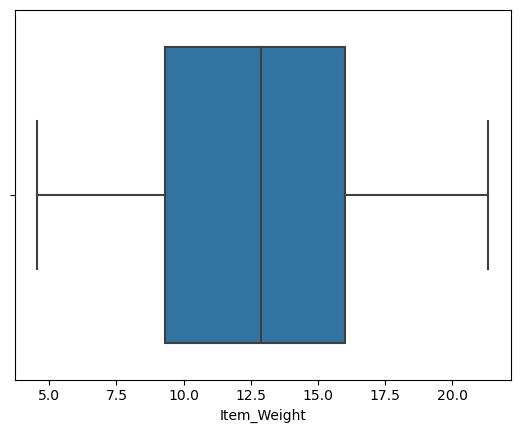

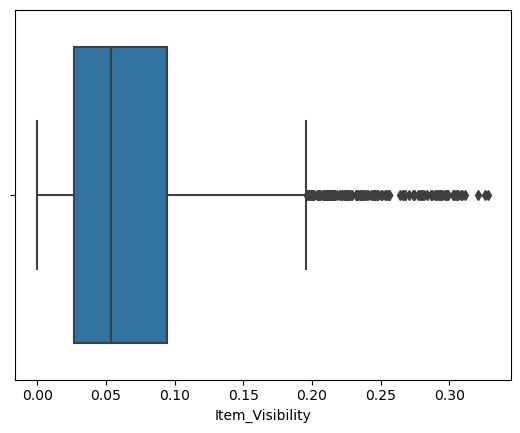

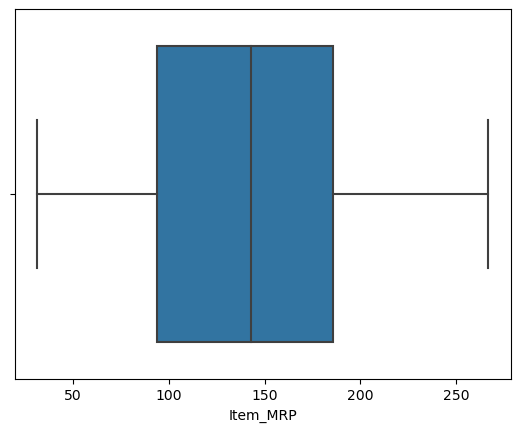

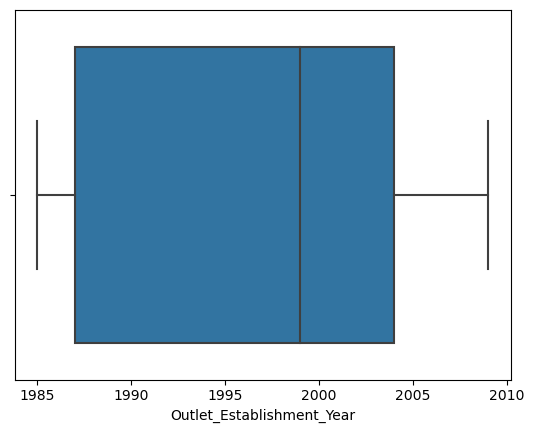

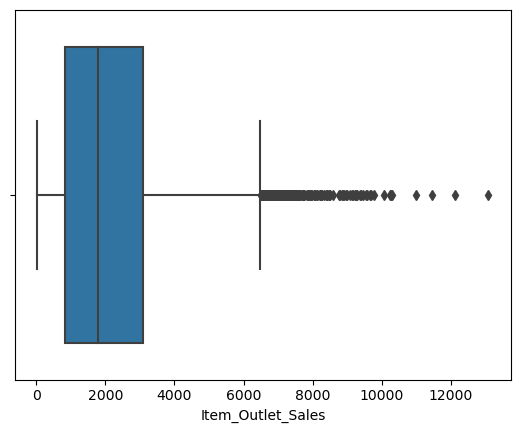

In [27]:
# Visualizing boxplots for numerical columns to identify outliers
columns = np.array(train_data.select_dtypes(include='number').columns)
for col in columns:
    sns.boxplot(x=col, data=train_data)
    plt.show()

In [28]:
# Removing outliers from the training data
columns = np.array(train_data.select_dtypes(include='number').columns)
for col in columns:
    IQR = train_data[col].quantile(0.75) - train_data[col].quantile(0.25)
    lower = train_data[col].quantile(0.25) - 1.5 * IQR
    upper = train_data[col].quantile(0.75) + 1.5 * IQR
    outlier = (train_data[col] <= lower) | (train_data[col] >= upper)
    train_data.drop(train_data[outlier].index, inplace=True)

In [29]:
# Checking skewness and kurtosis of numerical columns after outlier removal
columns = np.array(train_data.select_dtypes(include='number').columns)
for col in columns:
    print('Skewness of ' + col + ' is: ' + str(train_data[col].skew()))
    print('Kurtosis of ' + col + ' is: ' + str(train_data[col].kurt()))

Skewness of Item_Weight is: 0.0871989224013325
Kurtosis of Item_Weight is: -0.911695685864212
Skewness of Item_Visibility is: 0.7351643684117823
Kurtosis of Item_Visibility is: -0.2709398476653573
Skewness of Item_MRP is: 0.1514622792891879
Kurtosis of Item_MRP is: -0.8540333985512629
Skewness of Outlet_Establishment_Year is: -0.4381172418722293
Kurtosis of Outlet_Establishment_Year is: -1.1440914864036316
Skewness of Item_Outlet_Sales is: 0.7685148064520094
Kurtosis of Item_Outlet_Sales is: -0.1297124164021195


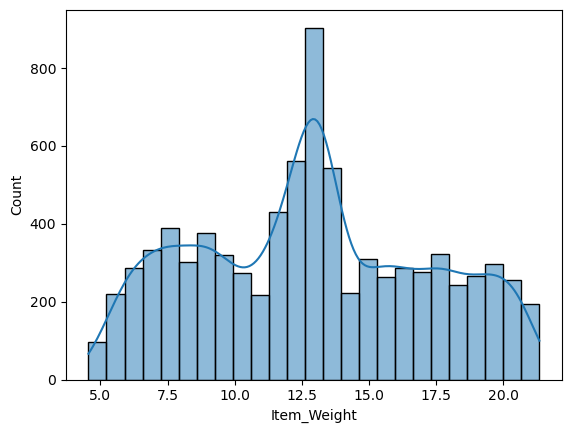

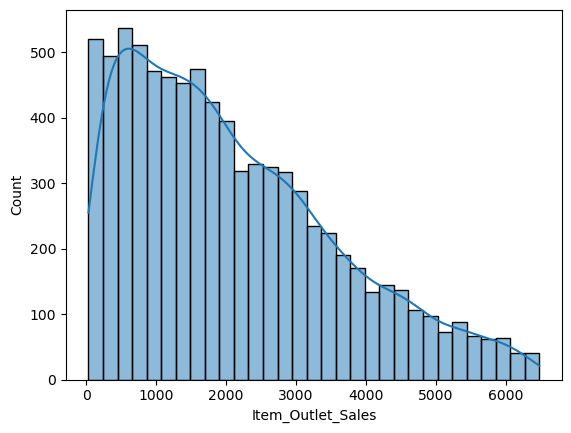

In [30]:
# Visualizing histograms for numerical columns after outlier removal
columns = np.array(train_data.select_dtypes(include='number').columns)
for col in columns:
    sns.histplot(x=col, data=train_data, kde=True)
    plt.show()

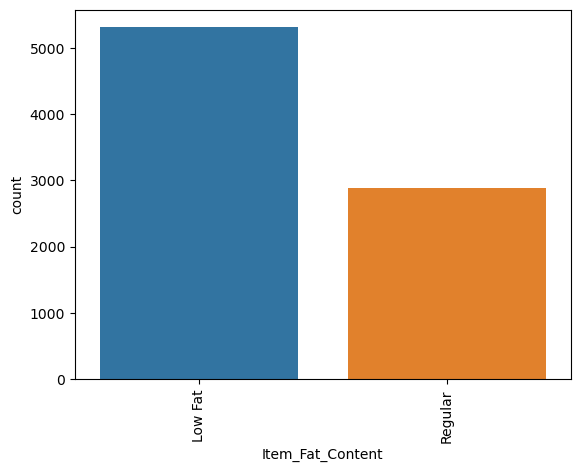

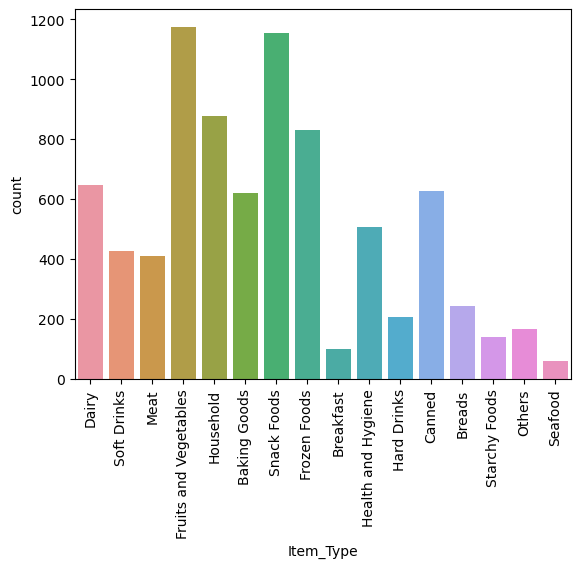

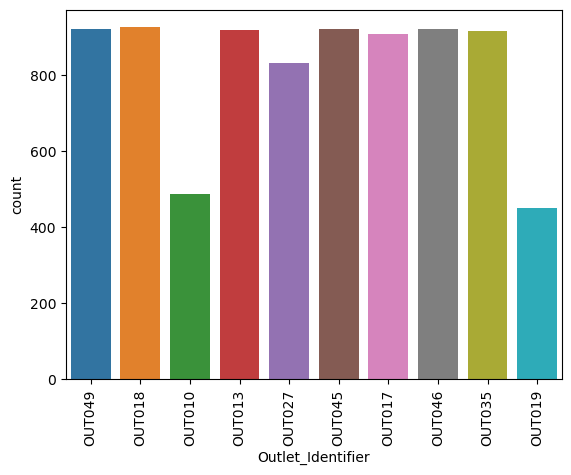

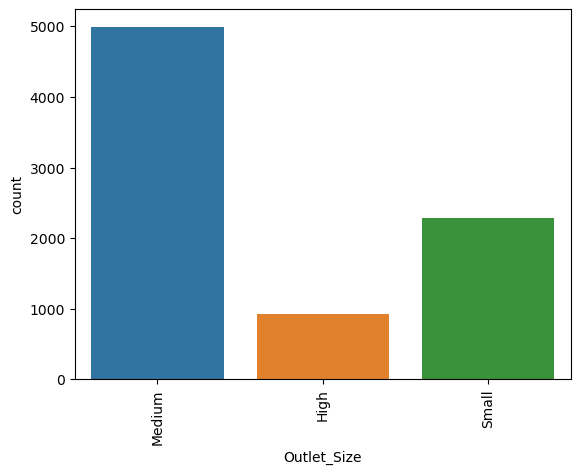

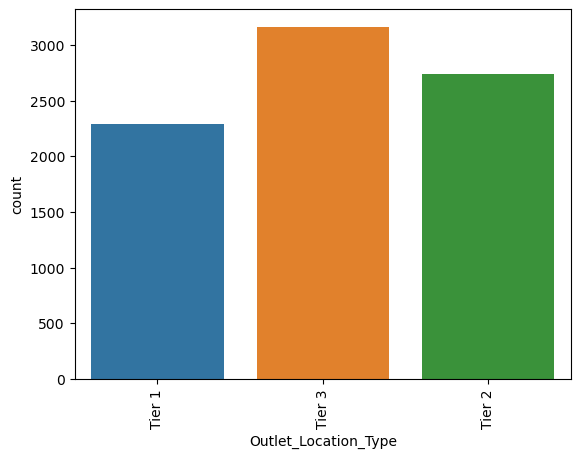

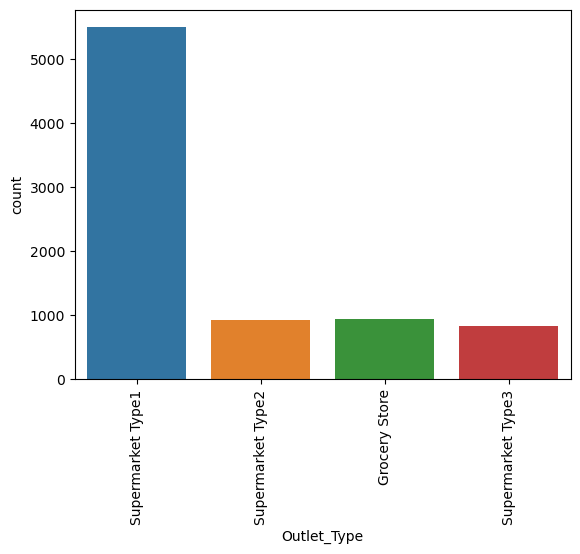

In [31]:
# Visualizing count plots for categorical columns
columns = np.array(train_data.select_dtypes(include='object').columns)
columns=np.delete(columns, 0)
for col in columns:
    sns.countplot(x=col, data=train_data)
    plt.xticks(rotation=90)
    plt.show()

<AxesSubplot:>

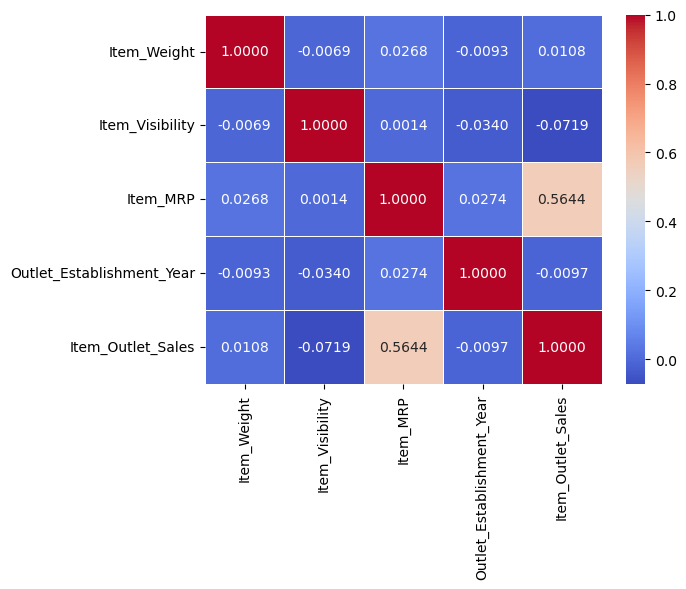

In [32]:
# Calculating correlation matrix and visualizing it as a heatmap
train_data.corr()
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt=".4f", linewidths=.5)

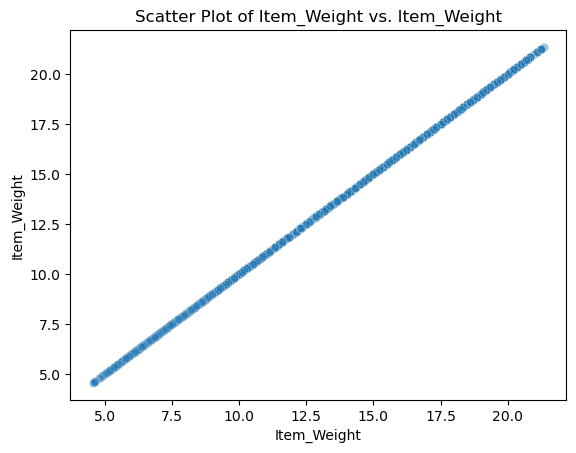

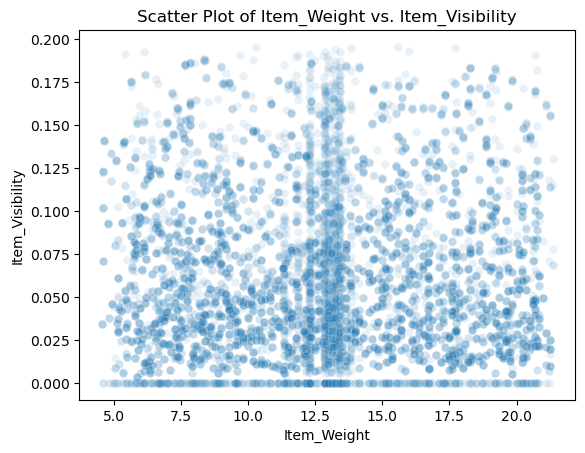

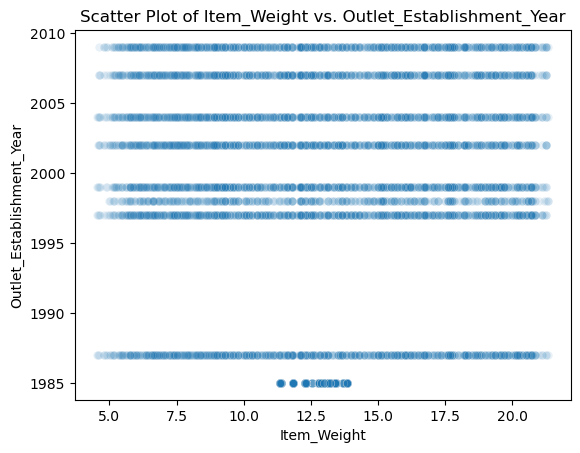

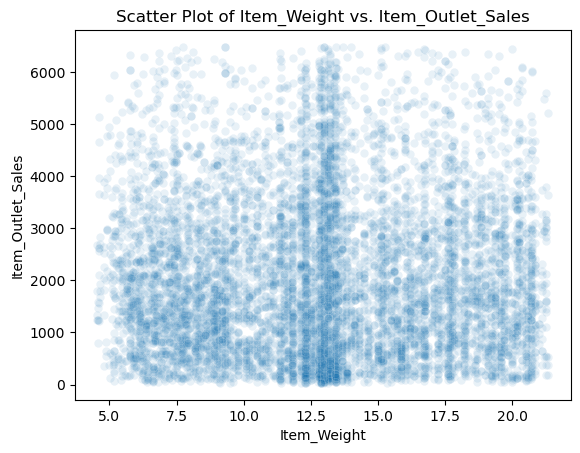

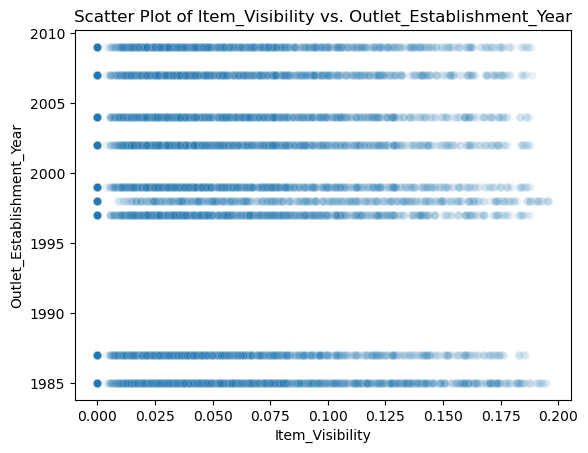

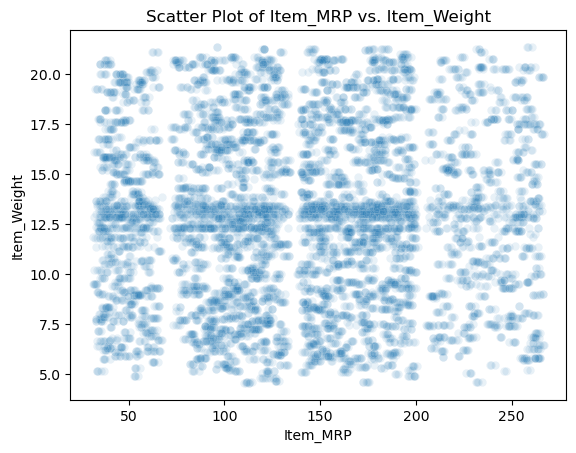

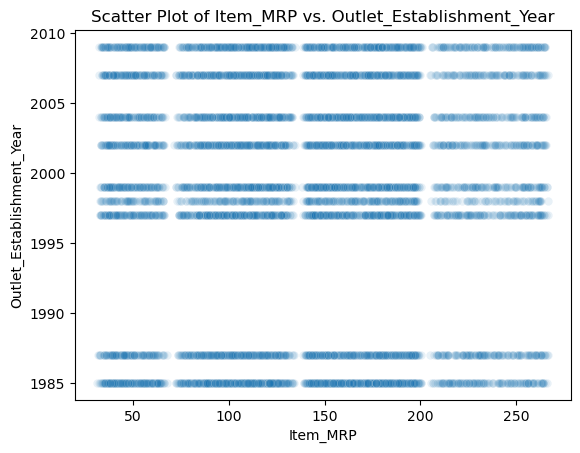

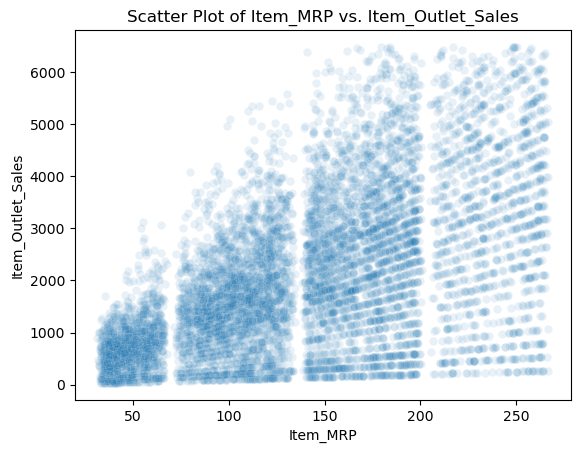

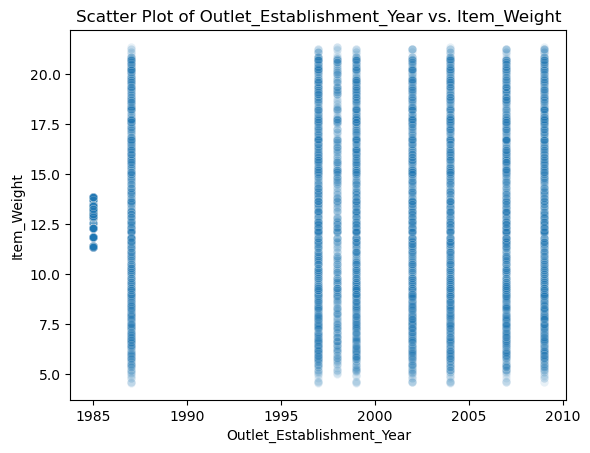

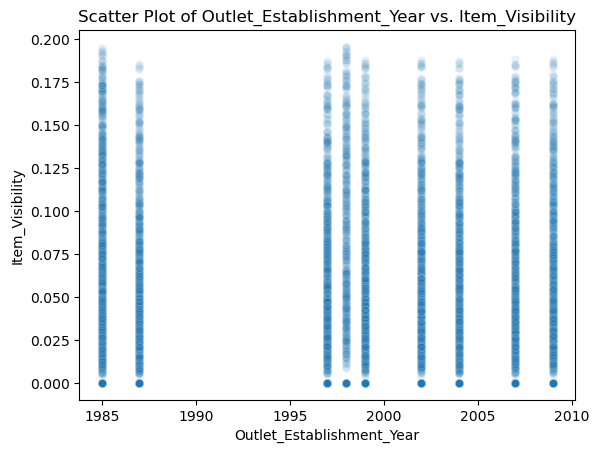

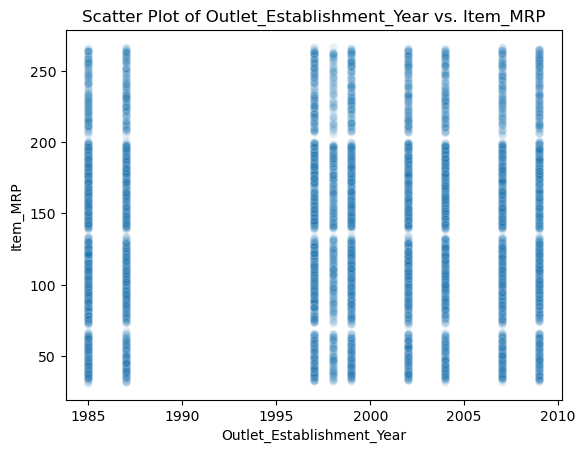

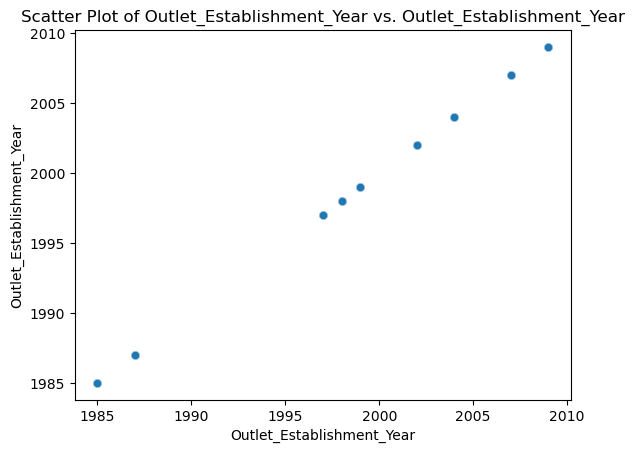

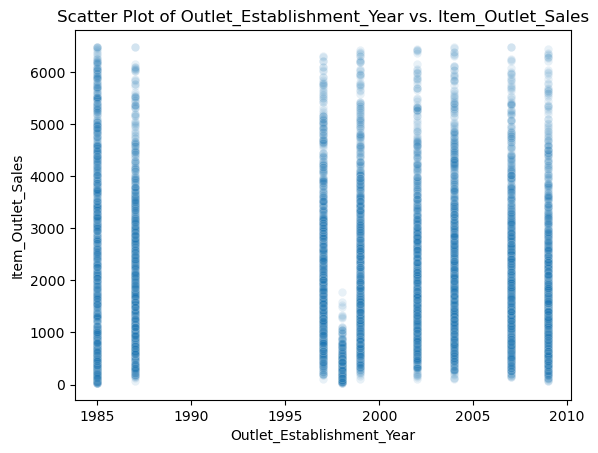

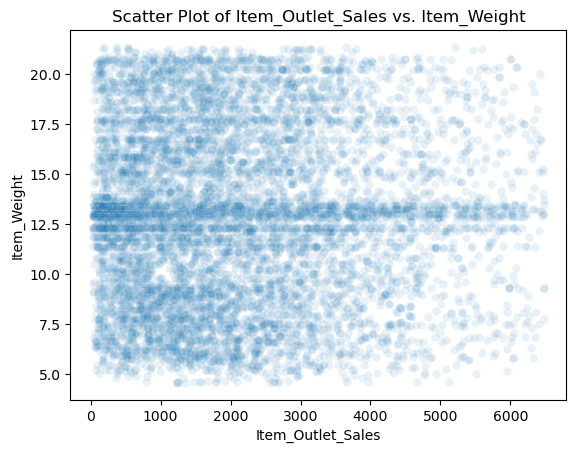

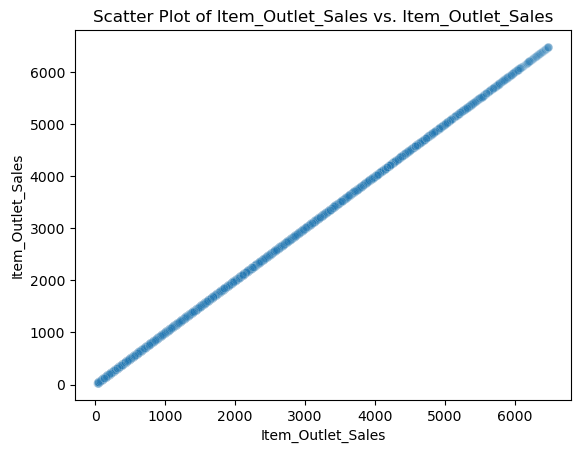

In [33]:
# Visualizing scatter plots for pairs of numerical columns
columns = train_data.select_dtypes(include="number").columns
for col1 in columns:
    for col2 in columns:
        sns.scatterplot(data=train_data, x=col1, y=col2, alpha=0.1)
        plt.title('Scatter Plot of ' + col1)
        # Visualizing scatter plots for pairs of numerical columns (continued)
        plt.title('Scatter Plot of ' + col1 + ' vs. ' + col2)
        plt.xlabel(col1)
        plt.ylabel(col2)
        plt.show()

In [34]:
# Grouping 'Item_Outlet_Sales' by 'Item_Type' and calculating the mean
train_data.groupby("Item_Type")["Item_Outlet_Sales"].mean().sort_values()

Item_Type
Soft Drinks              1881.866588
Breakfast                1918.578509
Baking Goods             1924.092423
Health and Hygiene       1927.993961
Others                   1947.664341
Frozen Foods             2055.578887
Hard Drinks              2070.075126
Meat                     2073.109111
Dairy                    2074.917996
Breads                   2101.077716
Canned                   2157.439814
Household                2163.842408
Fruits and Vegetables    2173.400122
Snack Foods              2183.237819
Starchy Foods            2301.498163
Seafood                  2364.522120
Name: Item_Outlet_Sales, dtype: float64

In [35]:
# Grouping 'Item_MRP' by 'Item_Type' and calculating the mean
train_data.groupby("Item_Type")["Item_MRP"].mean().sort_values()

Item_Type
Baking Goods             125.255351
Soft Drinks              128.755449
Health and Hygiene       128.825534
Others                   133.242430
Hard Drinks              135.650617
Frozen Foods             136.718657
Canned                   138.212805
Meat                     138.392370
Breads                   139.282487
Seafood                  139.730590
Breakfast                140.107790
Fruits and Vegetables    142.377587
Snack Foods              144.505292
Starchy Foods            145.477839
Dairy                    145.558125
Household                147.588109
Name: Item_MRP, dtype: float64

In [36]:
# Grouping 'Item_Outlet_Sales' by 'Outlet_Size' and calculating the mean
train_data.groupby("Outlet_Size")["Item_Outlet_Sales"].mean().sort_values()

Outlet_Size
Small     1902.991891
Medium    2151.509688
High      2217.100205
Name: Item_Outlet_Sales, dtype: float64

In [37]:
# Grouping 'Item_Outlet_Sales' by 'Outlet_Location_Type' and calculating the mean
train_data.groupby("Outlet_Location_Type")["Item_Outlet_Sales"].mean().sort_values()

Outlet_Location_Type
Tier 1    1878.006360
Tier 3    2110.323007
Tier 2    2242.293434
Name: Item_Outlet_Sales, dtype: float64

In [38]:
# Grouping 'Outlet_Type' by 'Outlet_Location_Type' and finding the mode
train_data.groupby("Outlet_Location_Type")["Outlet_Type"].apply(lambda x: x.mode())

Outlet_Location_Type   
Tier 1                0    Supermarket Type1
Tier 2                0    Supermarket Type1
Tier 3                0    Supermarket Type2
Name: Outlet_Type, dtype: object

In [39]:
# Grouping 'Item_Outlet_Sales' by 'Outlet_Type' and calculating the mean
train_data.groupby("Outlet_Type")["Item_Outlet_Sales"].mean().sort_values()

Outlet_Type
Grocery Store         339.433916
Supermarket Type2    1980.230278
Supermarket Type1    2242.617277
Supermarket Type3    3174.872101
Name: Item_Outlet_Sales, dtype: float64

In [40]:
# Counting the occurrences of unique values in categorical columns
train_data.select_dtypes(include='object').nunique()

Item_Identifier         1559
Item_Fat_Content           2
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [41]:
# Encoding categorical variables using LabelEncoder
label_encoder = LabelEncoder()
train_data['Outlet_Size'] = label_encoder.fit_transform(train_data['Outlet_Size'])
train_data['Outlet_Location_Type'] = label_encoder.fit_transform(train_data['Outlet_Location_Type'])
train_data['Outlet_Establishment_Year'] = label_encoder.fit_transform(train_data['Outlet_Establishment_Year'])

In [42]:
# One-hot encoding categorical variables using OneHotEncoder
categorical_columns = ["Item_Type", "Outlet_Identifier", "Outlet_Type"]
encoder = OneHotEncoder(sparse=False)
one_hot_encoded = encoder.fit_transform(train_data[["Item_Type", "Outlet_Identifier", "Outlet_Type"]])
columns_encoded = encoder.get_feature_names_out(["Item_Type", "Outlet_Identifier", "Outlet_Type"])
one_hot_td = pd.DataFrame(one_hot_encoded, columns=columns_encoded)

In [43]:
# Concatenating one-hot encoded dataframe with the original dataframe
train_data_encoded = pd.concat([train_data.reset_index(drop=True), one_hot_td.reset_index(drop=True)], axis=1)
train_data_encoded = train_data_encoded.drop(categorical_columns, axis=1)

In [44]:
# Getting dummy variables for 'Item_Fat_Content'
train_data_new = pd.get_dummies(train_data_encoded, columns=['Item_Fat_Content'])

In [45]:
# Mapping the frequency of each category in 'Item_Identifier'
category_frequency = train_data_new['Item_Identifier'].value_counts() / len(train_data_new)
train_data_new['Item_Identifier'] = train_data_new['Item_Identifier'].map(category_frequency)

In [46]:
# Scaling numerical features using MinMaxScaler
scaler = MinMaxScaler()
columns = np.array(train_data_new.select_dtypes(include='number').columns)
for col in columns:
    train_data_new[col] = scaler.fit_transform(train_data_new[[col]])

In [47]:
# Splitting the dataset into features (X) and target variable (y)
X = train_data_new.drop("Item_Outlet_Sales", axis=1)
y = train_data_new['Item_Outlet_Sales']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Creating and training a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluating the Linear Regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.025667041461287177
R-squared: 0.5426093841712348


In [49]:
# Creating and training a Ridge regression model
ridge_model = Ridge(alpha=1.0)  # Alpha is the regularization strength (hyperparameter)
ridge_model.fit(X_train, y_train)
y_pred_train = ridge_model.predict(X_train)
y_pred_test = ridge_model.predict(X_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Training MSE:", mse_train)
print("Testing MSE:", mse_test)

Training MSE: 0.024056826166394325
Testing MSE: 0.025667595233090156


In [50]:
# Creating and training a Lasso regression model
lasso_model = Lasso(alpha=1.0)  # Alpha is the regularization strength (hyperparameter)
lasso_model.fit(X_train, y_train)
y_pred_train = lasso_model.predict(X_train)
y_pred_test = lasso_model.predict(X_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Training MSE:", mse_train)
print("Testing MSE:", mse_test)

Training MSE: 0.053790545605363234
Testing MSE: 0.05620388753616985


In [51]:
# Defining the hyperparameters grid for Ridge regression
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}  # Regularization strength

In [52]:
# Performing Grid Search Cross Validation for Ridge regression
model = Ridge()
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("Best Hyperparameters:", best_params)
print("Training MSE:", mse_train)
print("Testing MSE:", mse_test)

Best Hyperparameters: {'alpha': 1}
Training MSE: 0.024056826166394325
Testing MSE: 0.025667595233090156


In [53]:
# Performing K-Fold Cross Validation for Linear Regression
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)
mse_list = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
average_mse = np.mean(mse_list)
print("Average MSE across all folds:", average_mse)

Average MSE across all folds: 0.024560986943215114
